<a href="https://colab.research.google.com/github/JerKeller/MP-Ecotaxa/blob/main/DVM_april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import sys
import subprocess
from plotnine import ggplot, aes, geom_point, geom_line, labs, ggtitle, scale_y_log10
import matplotlib.pyplot as plt
import seaborn as sns
     

from google.colab import drive
     

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DVM_april = '/content/drive/MyDrive/Ecotaxa_analysis/DVM_april.tsv'
tsv_read = pd.read_csv(DVM_april, sep='\t')
     

In [3]:
sub1 = tsv_read[['object_id','object_date','object_time', 'object_depth_min', 'object_depth_max', 'object_annotation_category',
                 'object_area', 'object_area_exc', 'object_major', 'object_minor', 'sample_tot_vol', 'process_particle_pixel_size_mm',
                 'acq_id']]

In [4]:
sub1.columns = ['Label', 'Date', 'Hour', 'Min_depth', 'Max_depth', 'Taxa', 'area', 'areaExc', 'major', 'minor',
                'Tow_Vol', 'pixel_size_mm', 'acq_id']

In [5]:
sub2 = sub1[(sub1['Taxa'] != 'badfocus<artefact') & (sub1['Taxa'] != 'fiber<detritus') & 
            (sub1['Taxa'] != 'multiple<other') & (sub1['Taxa'] != 'detritus') & 
            (sub1['Taxa'] != 'egg sac<egg') & (sub1['Taxa'] != 't001') & 
            (sub1['Taxa'] != 't002') & (sub1['Taxa'] != 't003') & 
            (sub1['Taxa'] != 'othertocheck') & (sub1['Taxa'] != 'artefact') & 
            (sub1['Taxa'] != 'bubble') & (sub1['Taxa'] != 'dead<Copepoda')].copy()


In [6]:
print(sub2)

            Label      Date    Hour  Min_depth  Max_depth  \
0       1_tot_1_1  20230413  162300        0.0      100.0   
3       1_tot_1_4  20230413  162300        0.0      100.0   
4       1_tot_1_5  20230413  162300        0.0      100.0   
5       1_tot_1_6  20230413  162300        0.0      100.0   
6       1_tot_1_7  20230413  162300        0.0      100.0   
...           ...       ...     ...        ...        ...   
28996  9_tot_1_52  20230413  184300       60.0       80.0   
28997  9_tot_1_53  20230413  184300       60.0       80.0   
28998  9_tot_1_54  20230413  184300       60.0       80.0   
29011  9_tot_1_68  20230413  184300       60.0       80.0   
29014  9_tot_1_71  20230413  184300       60.0       80.0   

                       Taxa    area  areaExc  major  minor  Tow_Vol  \
0      Eudiaptomus gracilis  2290.0   2289.0   59.7   48.8   7.0686   
3        Cyclops prealpinus  3472.0   3472.0   82.7   53.4   7.0686   
4        Cyclops prealpinus  5298.0   5293.0  121.4   

In [7]:
substrat = sub2[~sub2['acq_id'].isin(['tot_32','tot_1','tot_7','tot_13','tot_19','tot_25','tot_31','tot_38','tot_44','tot_50','tot_56'])].copy()

Pixel to mm

In [8]:
substrat['Area_mm2'] = substrat['area'] * ((substrat['pixel_size_mm']) ** 2)
substrat['AreaExc_mm2'] = substrat['areaExc'] * ((substrat['pixel_size_mm']) ** 2)
substrat['Major_mm'] = substrat['major'] * substrat['pixel_size_mm']
substrat['Minor_mm'] = substrat['minor'] * substrat['pixel_size_mm']

In [9]:
substrat['Date'] = pd.to_datetime(substrat['Date'], format='%Y%m%d')

Ellipsoidal Volume = V (mm3) = 4/3 x ∏ x [ (Major(mm)/2) x (Minor(mm)/2) x (Minor(mm)/2) ]

In [10]:
substrat['V_mm3'] = (4 / 3) * np.pi * ((substrat['Major_mm'] / 2) * (substrat['Minor_mm'] / 2) * (substrat['Minor_mm'] / 2))

In [11]:
print(substrat)

             Label       Date    Hour  Min_depth  Max_depth  \
1850    10_tot_1_2 2023-04-13  185400       40.0       60.0   
1855    10_tot_1_7 2023-04-13  185400       40.0       60.0   
1857    10_tot_1_9 2023-04-13  185400       40.0       60.0   
1860   10_tot_1_12 2023-04-13  185400       40.0       60.0   
1862   10_tot_1_14 2023-04-13  185400       40.0       60.0   
...            ...        ...     ...        ...        ...   
28996   9_tot_1_52 2023-04-13  184300       60.0       80.0   
28997   9_tot_1_53 2023-04-13  184300       60.0       80.0   
28998   9_tot_1_54 2023-04-13  184300       60.0       80.0   
29011   9_tot_1_68 2023-04-13  184300       60.0       80.0   
29014   9_tot_1_71 2023-04-13  184300       60.0       80.0   

                       Taxa    area  areaExc  major  minor  Tow_Vol  \
1850   Eudiaptomus gracilis  4824.0   4809.0  131.9   46.6   1.4137   
1855   Eudiaptomus gracilis  1207.0   1204.0   47.7   32.2   1.4137   
1857     Cyclops prealpinus  2

In [13]:
tot_2 = substrat[substrat['acq_id'] == 'tot_2']
tot_3 = substrat[substrat['acq_id'] == 'tot_3']
tot_4 = substrat[substrat['acq_id'] == 'tot_4']
tot_5 = substrat[substrat['acq_id'] == 'tot_5']
tot_6 = substrat[substrat['acq_id'] == 'tot_6']
tot_8 = substrat[substrat['acq_id'] == 'tot_8']
tot_9 = substrat[substrat['acq_id'] == 'tot_9']
tot_10 = substrat[substrat['acq_id'] == 'tot_10']
tot_11 = substrat[substrat['acq_id'] == 'tot_11']
tot_12 = substrat[substrat['acq_id'] == 'tot_12']
tot_14 = substrat[substrat['acq_id'] == 'tot_14']
tot_15 = substrat[substrat['acq_id'] == 'tot_15']
tot_16 = substrat[substrat['acq_id'] == 'tot_16']
tot_17 = substrat[substrat['acq_id'] == 'tot_17']
tot_18 = substrat[substrat['acq_id'] == 'tot_18']
tot_20 = substrat[substrat['acq_id'] == 'tot_20']
tot_21 = substrat[substrat['acq_id'] == 'tot_21']
tot_22 = substrat[substrat['acq_id'] == 'tot_22']
tot_23 = substrat[substrat['acq_id'] == 'tot_23']
tot_24 = substrat[substrat['acq_id'] == 'tot_24']
tot_26 = substrat[substrat['acq_id'] == 'tot_26']
tot_27 = substrat[substrat['acq_id'] == 'tot_27']
tot_28 = substrat[substrat['acq_id'] == 'tot_28']
tot_29 = substrat[substrat['acq_id'] == 'tot_29']
tot_30 = substrat[substrat['acq_id'] == 'tot_30']
tot_33 = substrat[substrat['acq_id'] == 'tot_33']
tot_34 = substrat[substrat['acq_id'] == 'tot_34']
tot_35 = substrat[substrat['acq_id'] == 'tot_35']
tot_36 = substrat[substrat['acq_id'] == 'tot_36']
tot_37 = substrat[substrat['acq_id'] == 'tot_37']
tot_39 = substrat[substrat['acq_id'] == 'tot_39']
tot_40 = substrat[substrat['acq_id'] == 'tot_40']
tot_41 = substrat[substrat['acq_id'] == 'tot_41']
tot_42 = substrat[substrat['acq_id'] == 'tot_42']
tot_43 = substrat[substrat['acq_id'] == 'tot_43']
tot_45 = substrat[substrat['acq_id'] == 'tot_45']
tot_46 = substrat[substrat['acq_id'] == 'tot_46']
tot_47 = substrat[substrat['acq_id'] == 'tot_47']
tot_48 = substrat[substrat['acq_id'] == 'tot_48']
tot_49 = substrat[substrat['acq_id'] == 'tot_49']
tot_51 = substrat[substrat['acq_id'] == 'tot_51']
tot_52 = substrat[substrat['acq_id'] == 'tot_52']
tot_53 = substrat[substrat['acq_id'] == 'tot_53']
tot_54 = substrat[substrat['acq_id'] == 'tot_54']
tot_55 = substrat[substrat['acq_id'] == 'tot_55']
tot_57 = substrat[substrat['acq_id'] == 'tot_57']
tot_58 = substrat[substrat['acq_id'] == 'tot_58']
tot_59 = substrat[substrat['acq_id'] == 'tot_59']
tot_60 = substrat[substrat['acq_id'] == 'tot_60']
tot_61 = substrat[substrat['acq_id'] == 'tot_61']

In [14]:
profile_1 = pd.concat([tot_2, tot_3, tot_4, tot_5, tot_6], ignore_index=True)
profile_2 = pd.concat([tot_8, tot_9, tot_10, tot_11, tot_12], ignore_index=True)
profile_3 = pd.concat([tot_14, tot_15, tot_16, tot_17, tot_18], ignore_index=True)
profile_4 = pd.concat([tot_20, tot_21, tot_22, tot_23, tot_24], ignore_index=True)
profile_5 = pd.concat([tot_26, tot_27, tot_28, tot_29, tot_30], ignore_index=True)
profile_6 = pd.concat([tot_33, tot_34, tot_35, tot_36, tot_37], ignore_index=True)
profile_7 = pd.concat([tot_39, tot_40, tot_41, tot_42, tot_43], ignore_index=True)
profile_8 = pd.concat([tot_45, tot_46, tot_47, tot_48, tot_49], ignore_index=True)
profile_9 = pd.concat([tot_51, tot_52, tot_53, tot_54, tot_55], ignore_index=True)
profile_10 = pd.concat([tot_57, tot_58, tot_59, tot_60, tot_61], ignore_index=True)

In [ ]:
# Pour le profil 1
profile_1_count = profile_1.groupby('Taxa').size().reset_index(name='Count')
print("Nombre d'individus par espèce pour le profil 1:")
print(profile_1_count)

# Pour le profil 2
profile_2_count = profile_2.groupby('Taxa').size().reset_index(name='Count')
print("\nNombre d'individus par espèce pour le profil 2:")
print(profile_2_count)

Nombre d'individus par espèce pour le profil 1:
                      Taxa  Count
0  Bythotrephes longimanus      1
1       Cyclops prealpinus    353
2       Daphnia<Daphniidae      4
3     Eudiaptomus gracilis    631
4         nauplii<Copepoda     91

Nombre d'individus par espèce pour le profil 2:
                   Taxa  Count
0    Cyclops prealpinus    375
1          Eubosmina sp      1
2  Eudiaptomus gracilis    429
3      nauplii<Copepoda     79


In [40]:
profiles = [profile_1, profile_2, profile_3, profile_4, profile_5, profile_6, profile_7, profile_8, profile_9, profile_10]

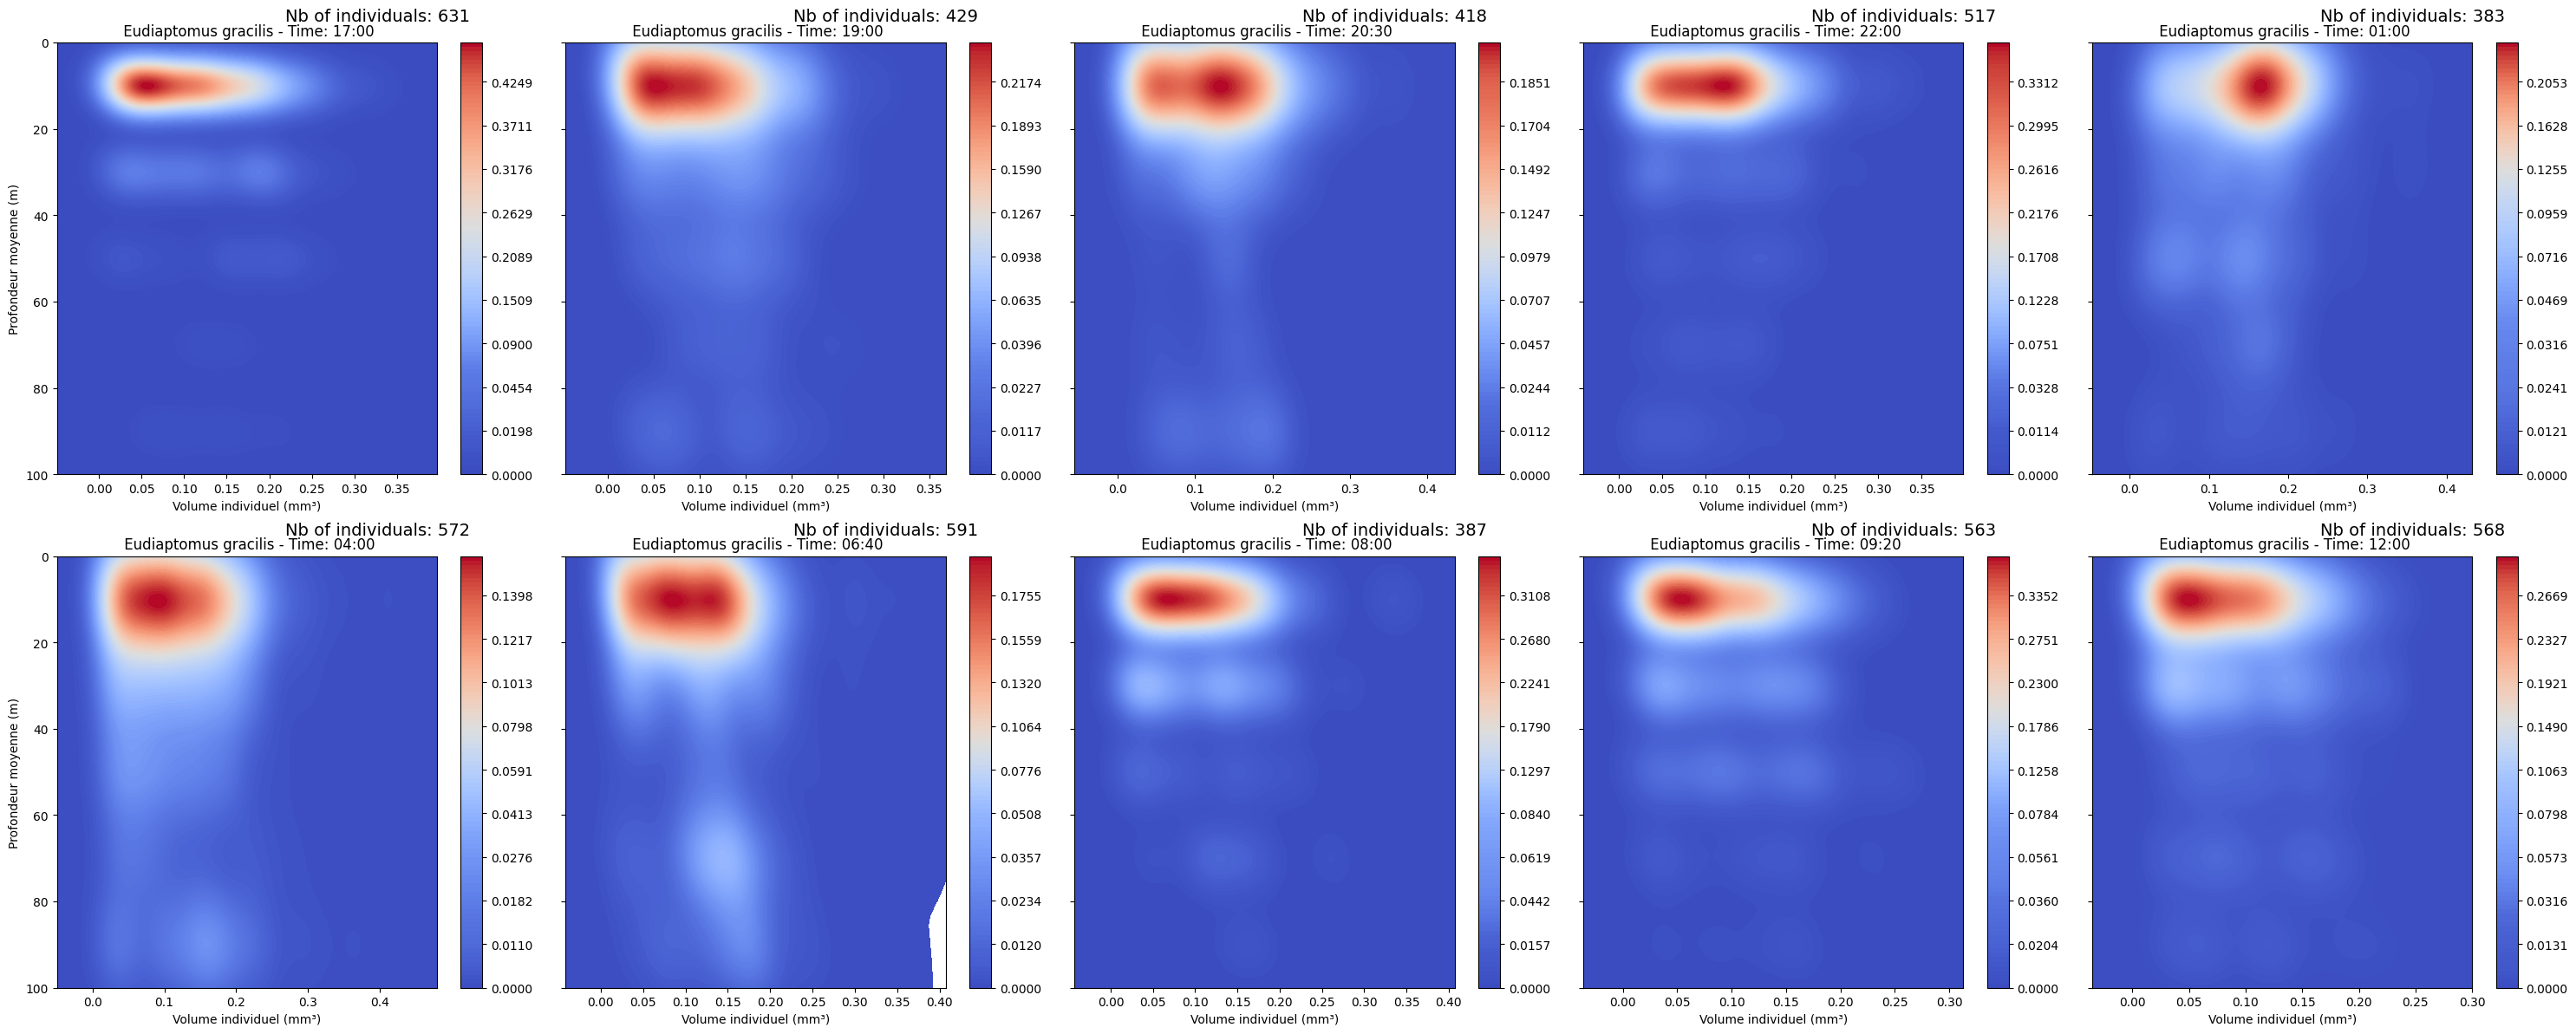

In [18]:

# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00', '04:00', '06:40', '08:00', '09:20', '12:00']

# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
sp = 'Eudiaptomus gracilis'
species_data_all_profiles = [profile[profile['Taxa'] == sp] for profile in profiles]

# Créez les sous-graphiques
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()
for idx, (hour, species_data) in enumerate(zip(hours, species_data_all_profiles)):
    species_data = species_data.copy()  # Ajoutez cette ligne pour créer une copie
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]


    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(species_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f' {sp} - Time: {hour}')
    axes[idx].set_xlabel('Volume individuel (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Profondeur moyenne (m)')
axes[5].set_ylabel('Profondeur moyenne (m)')
plt.tight_layout()
plt.show()

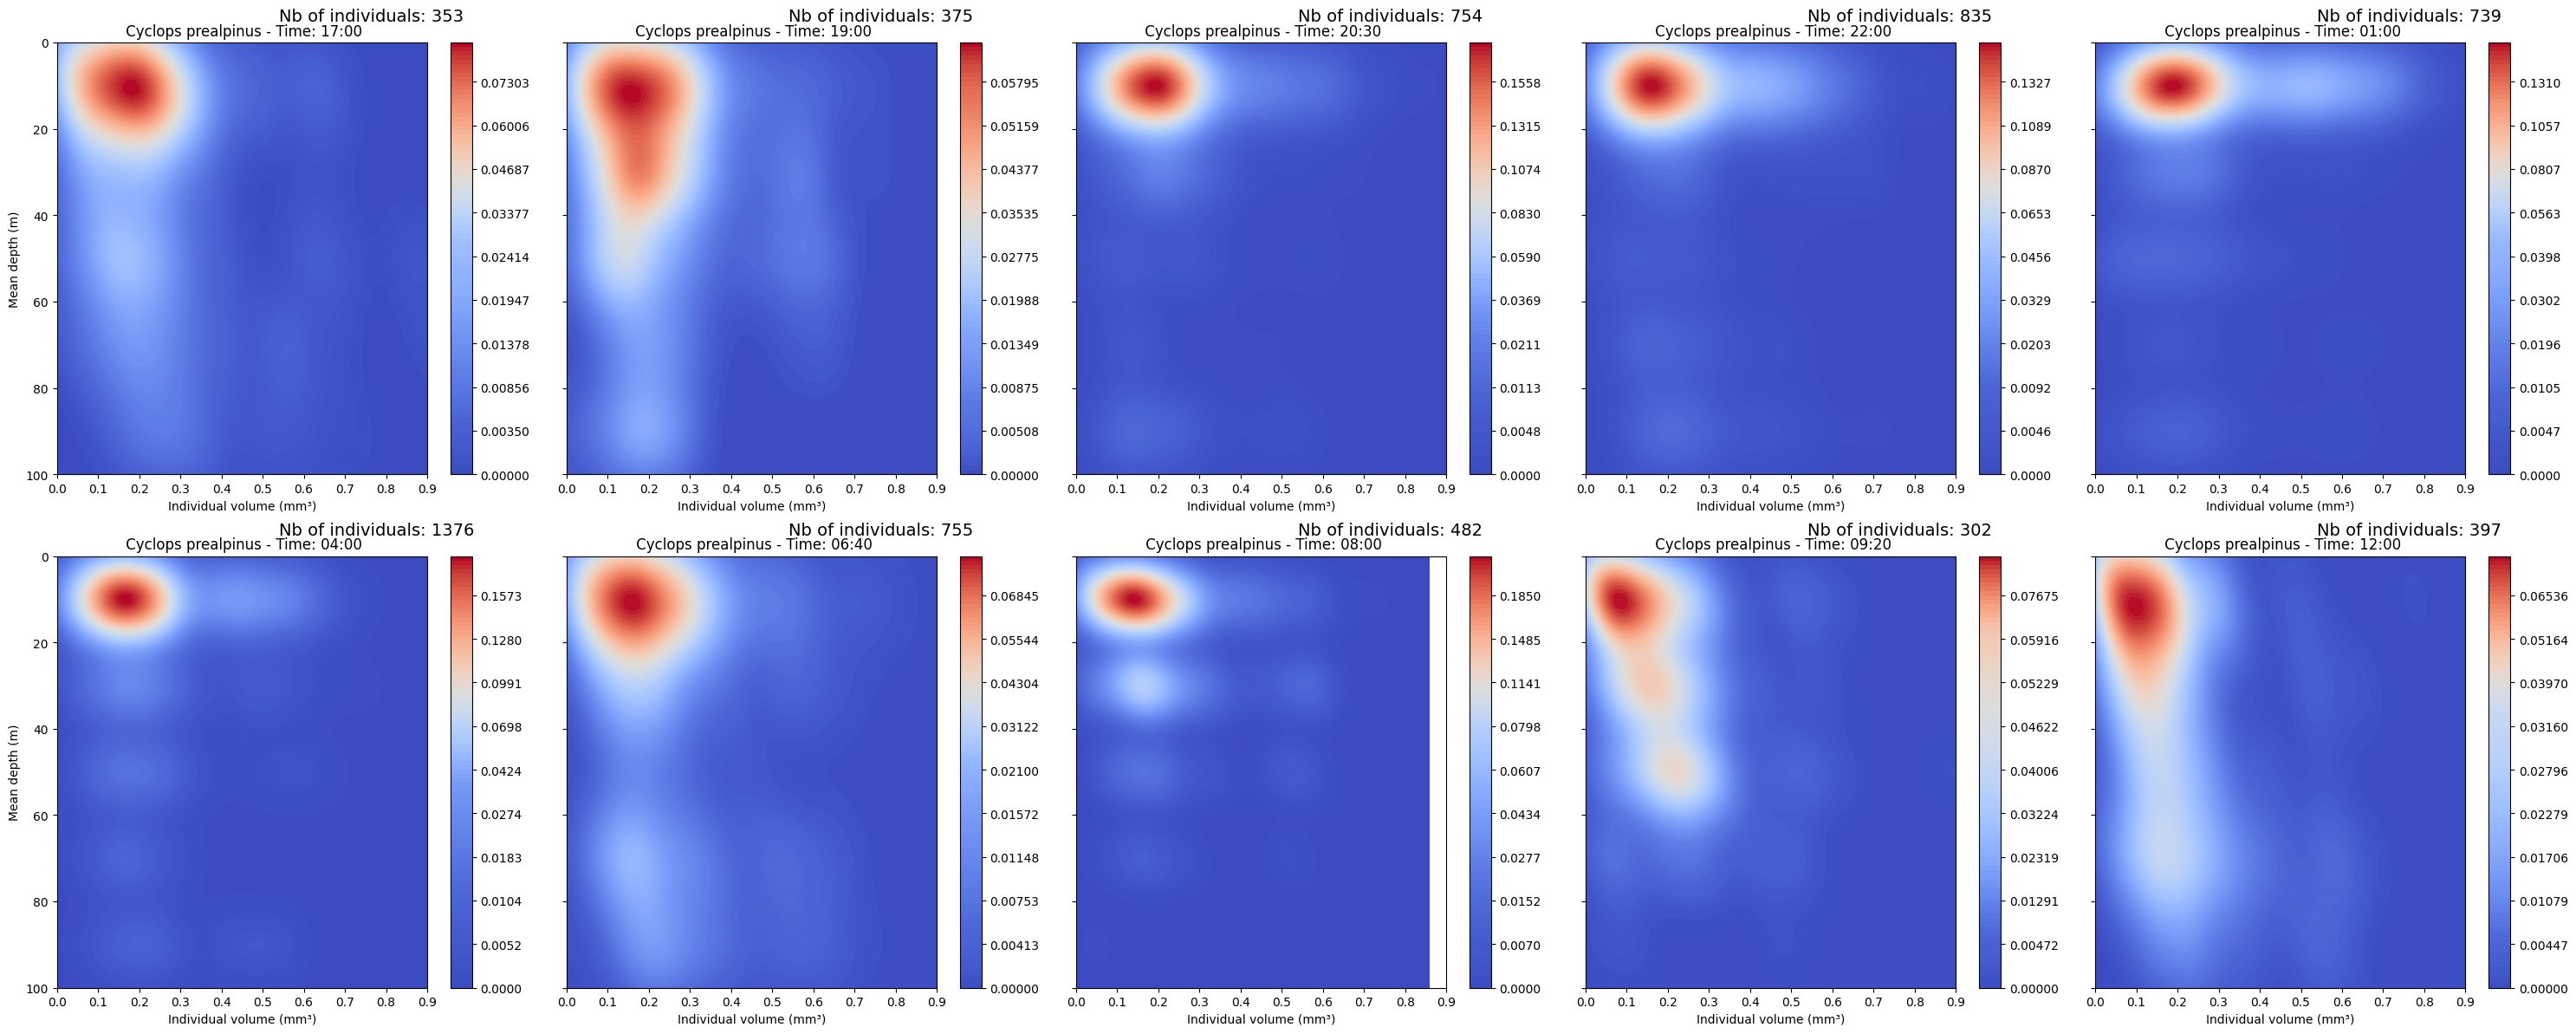

In [51]:
# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00', '04:00', '06:40', '08:00', '09:20', '12:00']

# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
sp = 'Cyclops prealpinus'
species_data_all_profiles = [profile[profile['Taxa'] == sp] for profile in profiles]

# Créez les sous-graphiques
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()
for idx, (hour, species_data) in enumerate(zip(hours, species_data_all_profiles)):
    species_data = species_data.copy()  # Ajoutez cette ligne pour créer une copie
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]


    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(species_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f' {sp} - Time: {hour}')
    axes[idx].set_xlabel('Individual volume (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m
    axes[idx].set_xlim(0, 0.9)

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Mean depth (m)')
axes[5].set_ylabel('Mean depth (m)')
plt.tight_layout()
plt.show()

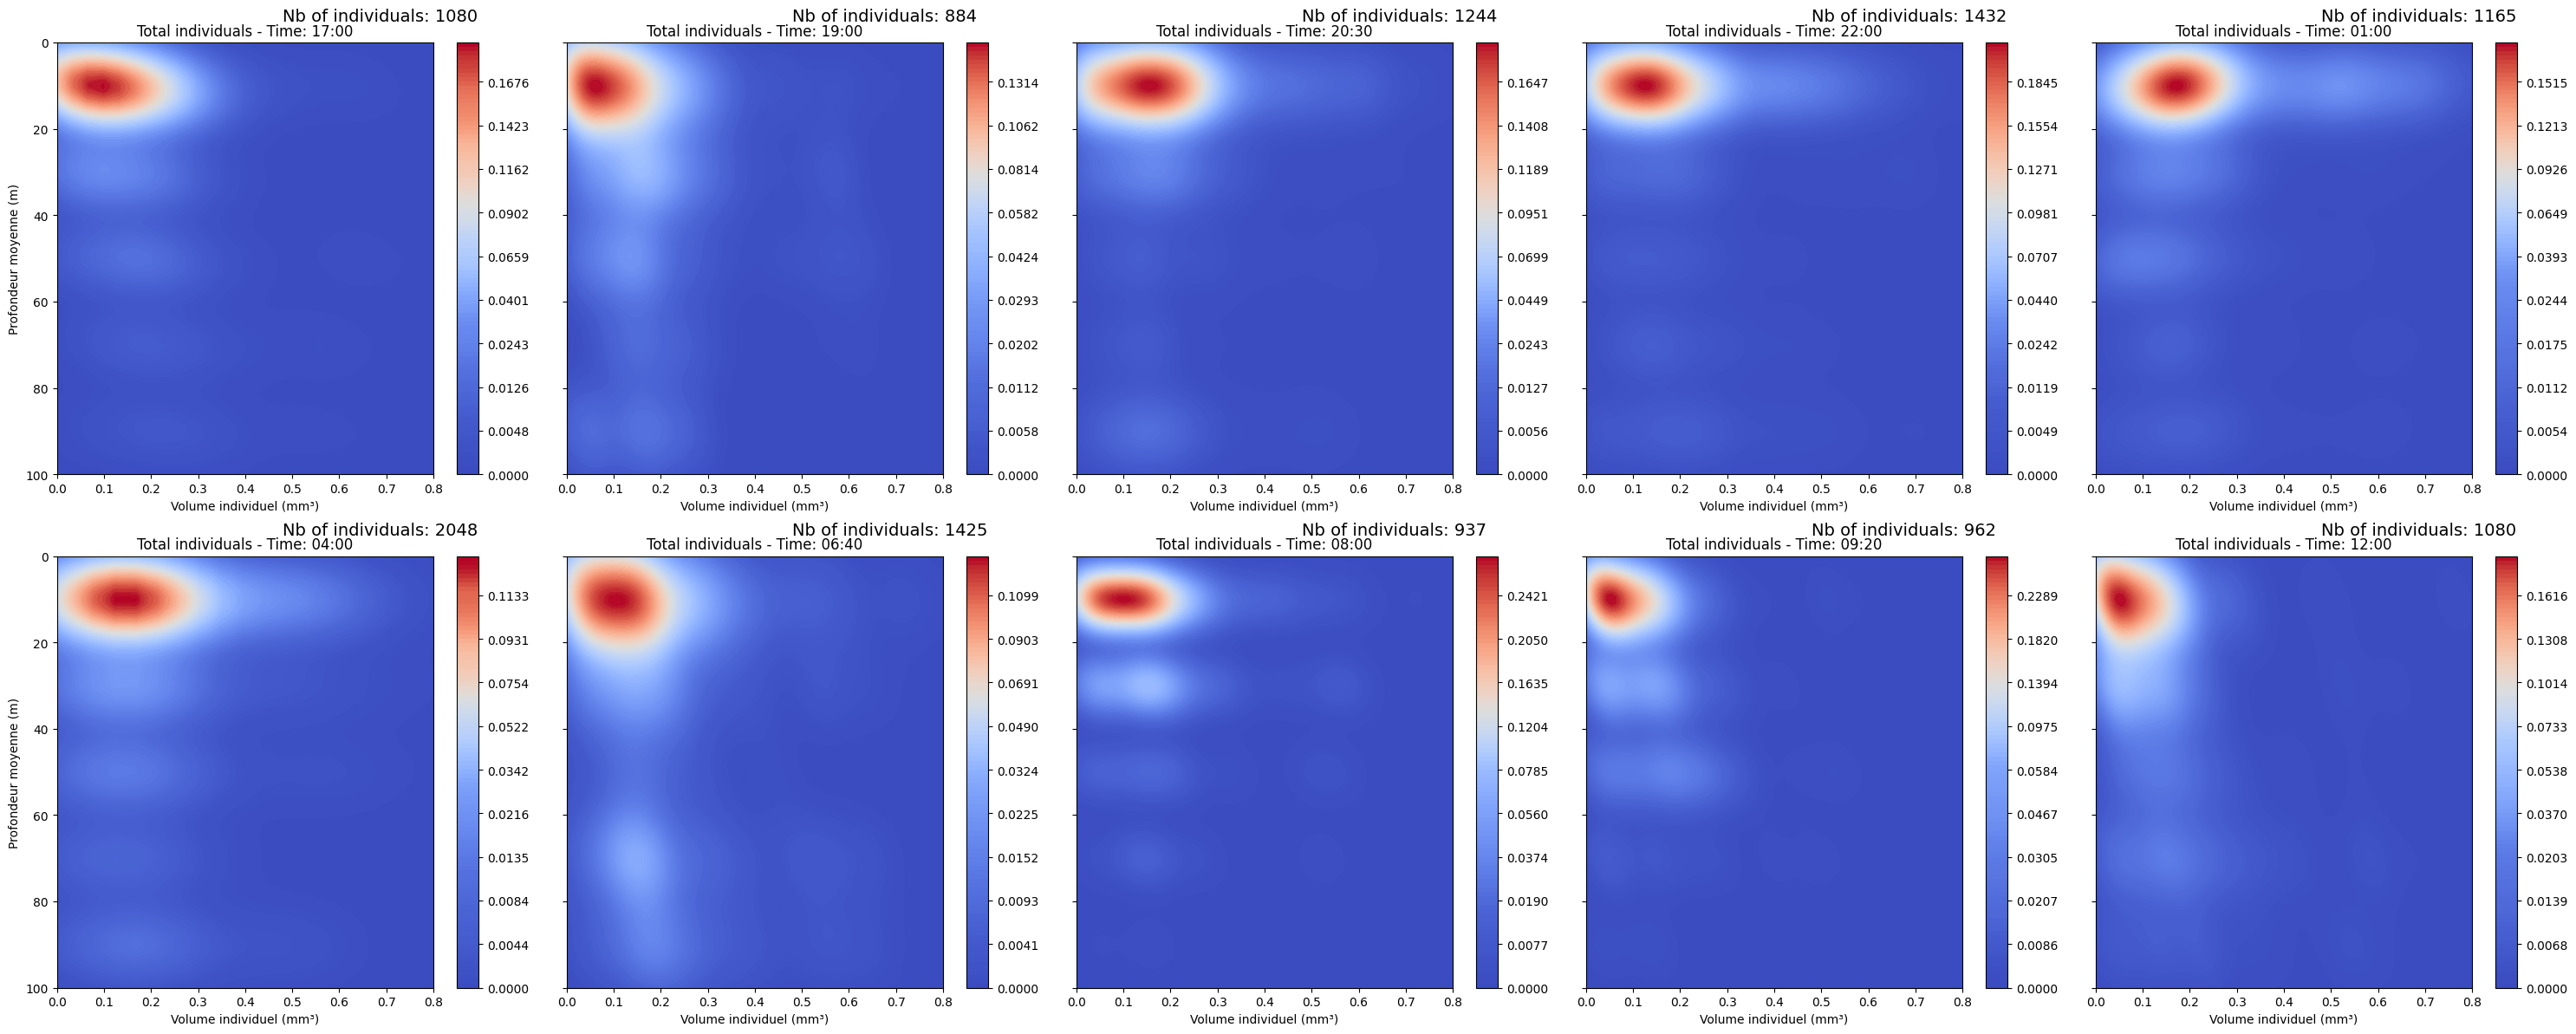

In [39]:
# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00', '04:00', '06:40', '08:00', '09:20', '12:00']

# Utilisez les données de tous les profils sans filtrer par espèce
all_data_profiles = profiles

# Créez les sous-graphiques
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()
for idx, (hour, profile_data) in enumerate(zip(hours, all_data_profiles)):
    profile_data = profile_data.copy()  # Créez une copie
    profile_data['Avg_depth'] = (profile_data['Min_depth'] + profile_data['Max_depth']) / 2
    profile_data = profile_data[(profile_data['Avg_depth'] >= 0) & (profile_data['Avg_depth'] <= 100)]

    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=profile_data['V_mm3'], y=profile_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(profile_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f'Total individuals - Time: {hour}')
    axes[idx].set_xlabel('Volume individuel (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m
    axes[idx].set_xlim(0, 0.8)

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Profondeur moyenne (m)')
axes[5].set_ylabel('Profondeur moyenne (m)')
plt.tight_layout()
plt.show()


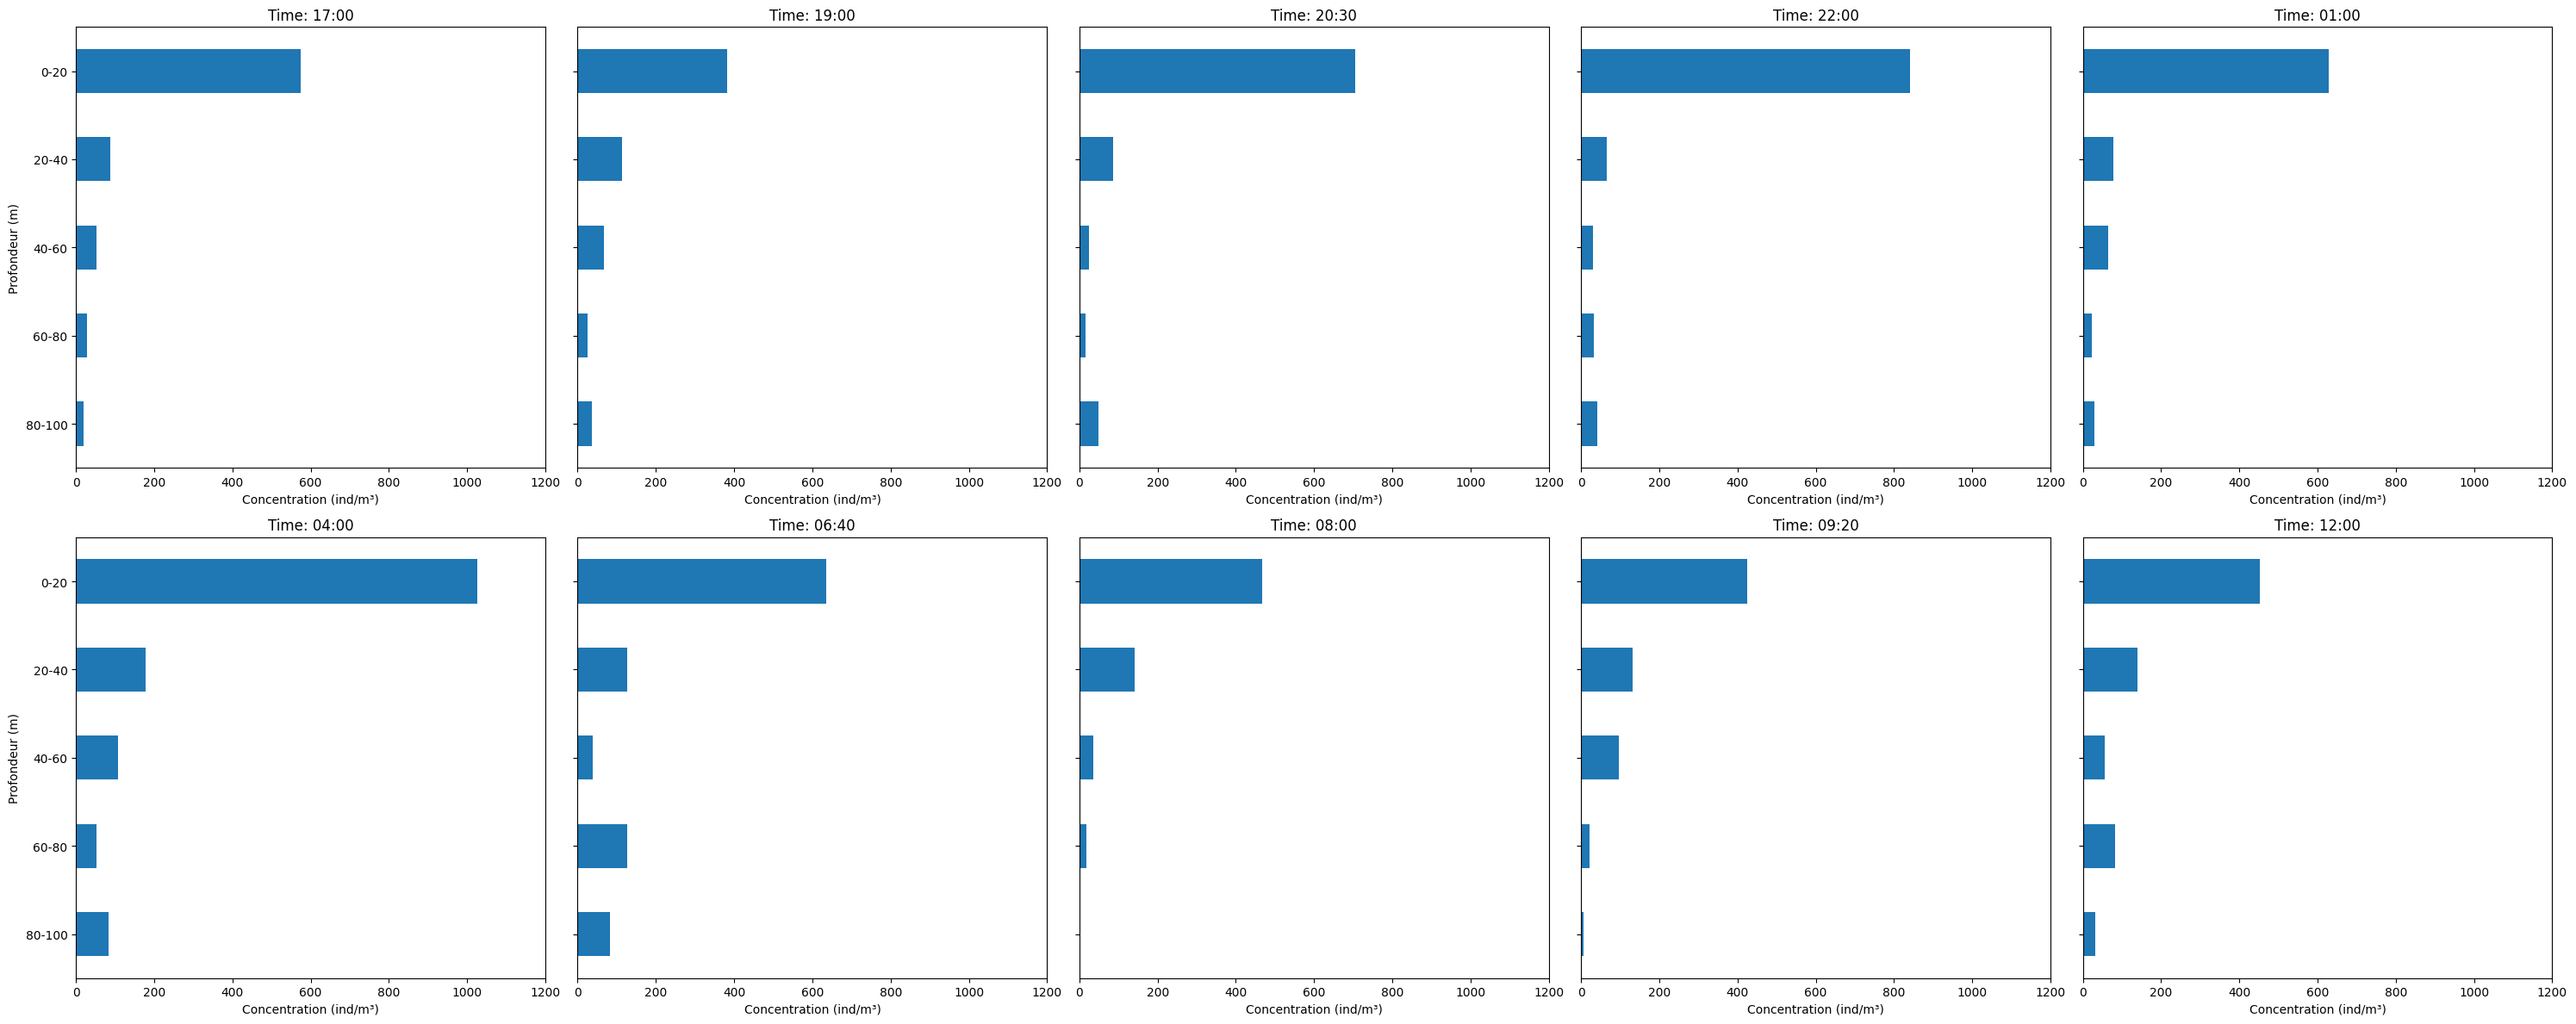

In [34]:
# Calculez la concentration d'individus par m³ pour chaque tranche de profondeur
def calculate_concentration(profile):
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=np.arange(0, 120, 20), right=False)
    concentration = profile.groupby('Depth_group').size() / profile['Tow_Vol'].iloc[0]
    return concentration

concentrations = [calculate_concentration(profile) for profile in profiles]

# Créez des bar plots horizontaux pour afficher ces concentrations en fonction de la profondeur
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()

for idx, (hour, concentration) in enumerate(zip(hours, concentrations)):
    ax = axes[idx]
    concentration.plot(kind='barh', ax=ax)
    ax.set_title(f'Time: {hour}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in concentration.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Concentration (ind/m³)')
    ax.set_ylim(-0.5, 4.5)
    ax.set_xlim(0, 1200)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()



AttributeError: ignored

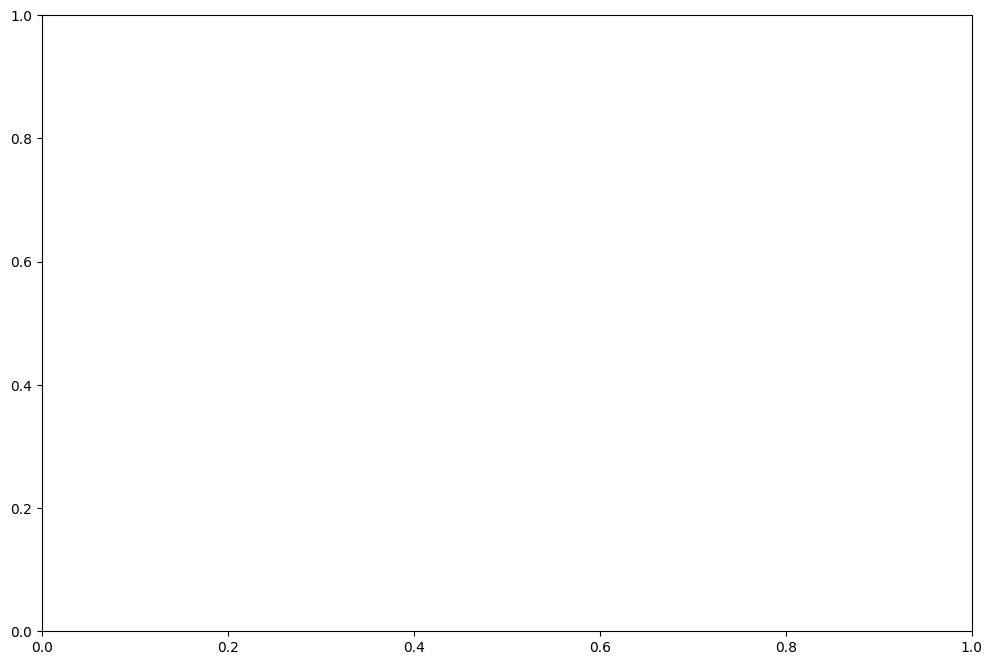

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Hour', y='Count', hue='Avg_depth', data=all_data_profiles, ax=ax)


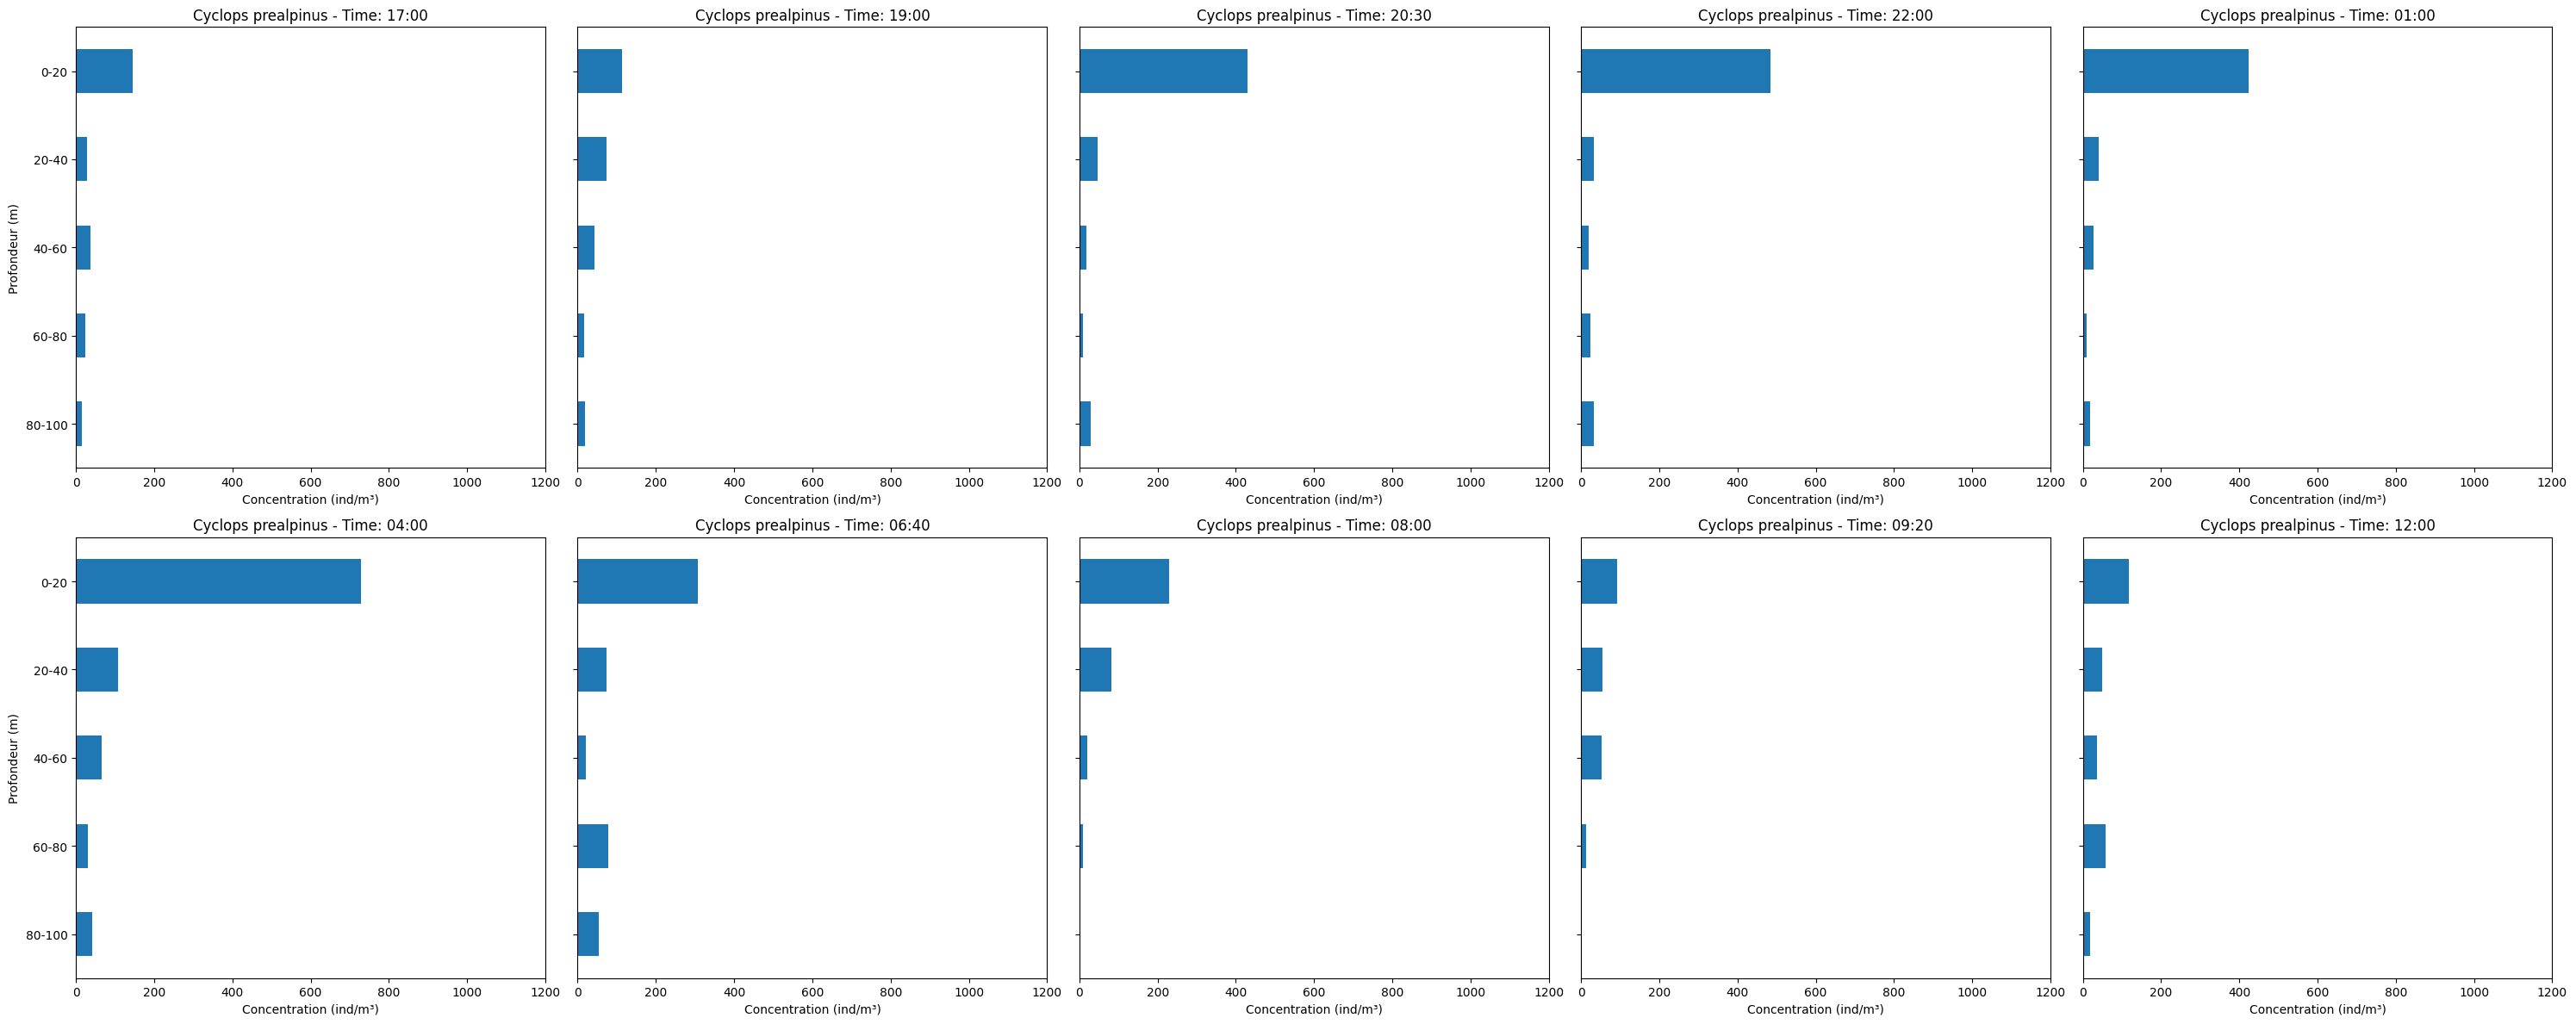

In [36]:
import matplotlib.pyplot as plt

# Filtrez les données pour ne garder que l'espèce Cyclops prealpinus
species = 'Cyclops prealpinus'
filtered_profiles = [profile[profile['Taxa'] == species] for profile in profiles]

def calculate_concentration(profile):
    profile = profile.copy()  # Créer une copie pour éviter l'avertissement
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=np.arange(0, 120, 20), right=False)
    concentration = profile.groupby('Depth_group').size() / profile['Tow_Vol'].iloc[0]
    return concentration

concentrations = [calculate_concentration(profile) for profile in filtered_profiles]

# Créez des bar plots horizontaux pour afficher ces concentrations en fonction de la profondeur
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()

for idx, (hour, concentration) in enumerate(zip(hours, concentrations)):
    ax = axes[idx]
    concentration.plot(kind='barh', ax=ax)
    ax.set_title(f'{species} - Time: {hour}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in concentration.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Concentration (ind/m³)')
    ax.set_ylim(-0.5, 4.5)
    ax.set_xlim(0, 1200)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()


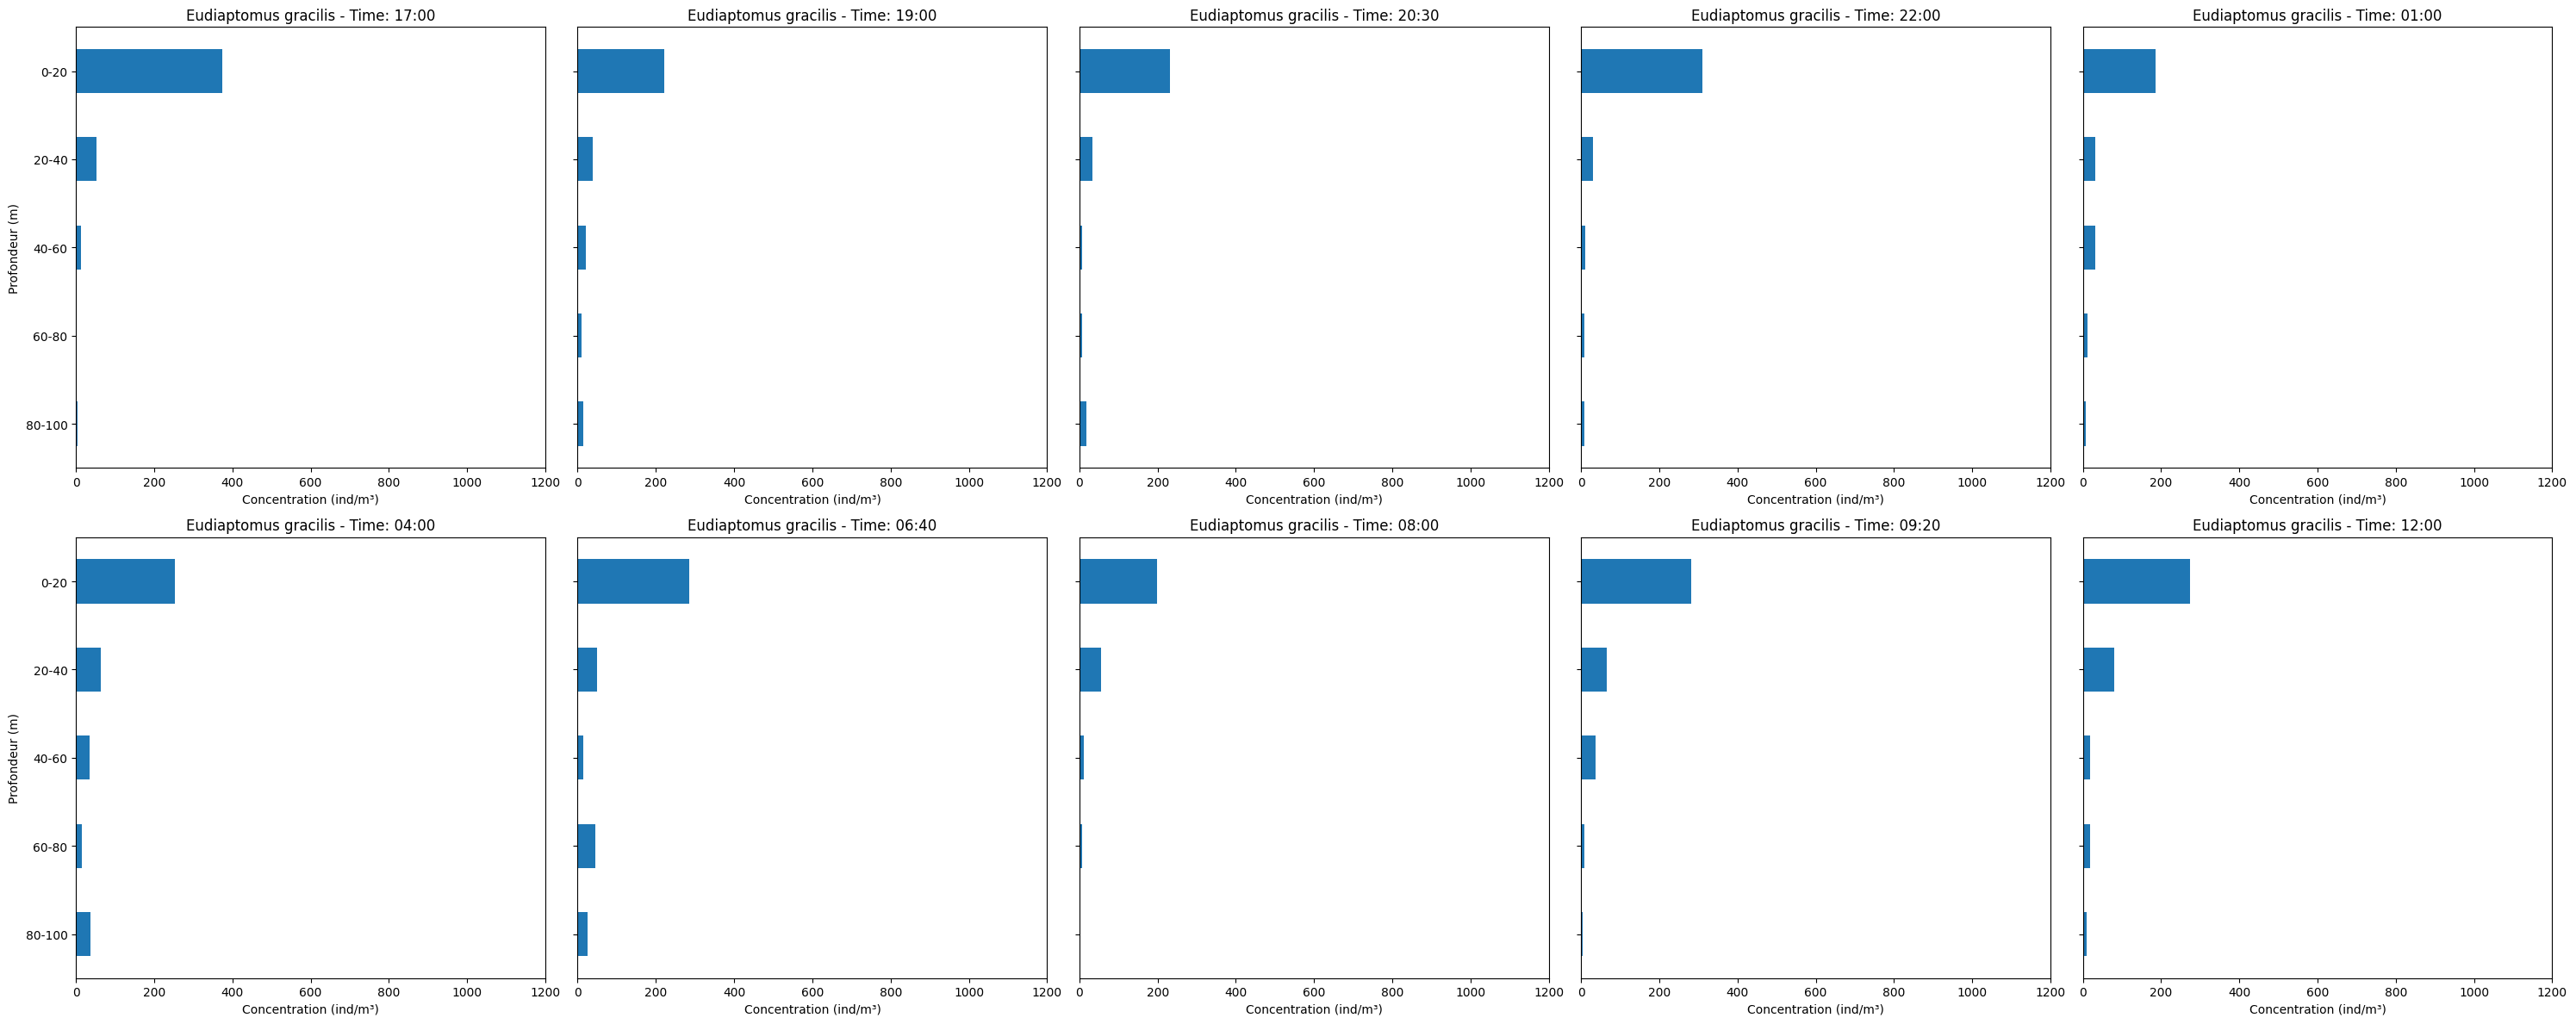

In [37]:
# Filtrez les données pour ne garder que l'espèce Cyclops prealpinus
species = 'Eudiaptomus gracilis'
filtered_profiles = [profile[profile['Taxa'] == species] for profile in profiles]

def calculate_concentration(profile):
    profile = profile.copy()  # Créer une copie pour éviter l'avertissement
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=np.arange(0, 120, 20), right=False)
    concentration = profile.groupby('Depth_group').size() / profile['Tow_Vol'].iloc[0]
    return concentration

concentrations = [calculate_concentration(profile) for profile in filtered_profiles]

# Créez des bar plots horizontaux pour afficher ces concentrations en fonction de la profondeur
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()

for idx, (hour, concentration) in enumerate(zip(hours, concentrations)):
    ax = axes[idx]
    concentration.plot(kind='barh', ax=ax)
    ax.set_title(f'{species} - Time: {hour}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in concentration.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Concentration (ind/m³)')
    ax.set_ylim(-0.5, 4.5)
    ax.set_xlim(0, 1200)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

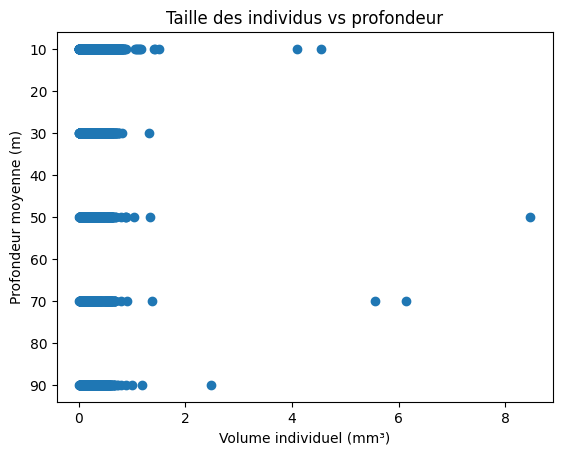

In [56]:
# Concaténez les DataFrames de tous les profils
all_profiles_data = pd.concat(profiles, ignore_index=True)

# Calculez la profondeur moyenne pour chaque ligne
all_profiles_data['Avg_depth'] = (all_profiles_data['Min_depth'] + all_profiles_data['Max_depth']) / 2

# Tracez le nuage de points
plt.scatter(all_profiles_data['V_mm3'], all_profiles_data['Avg_depth'])
plt.xlabel('Volume individuel (mm³)')
plt.ylabel('Profondeur moyenne (m)')
plt.title('Taille des individus vs profondeur')
plt.gca().invert_yaxis()
plt.show()

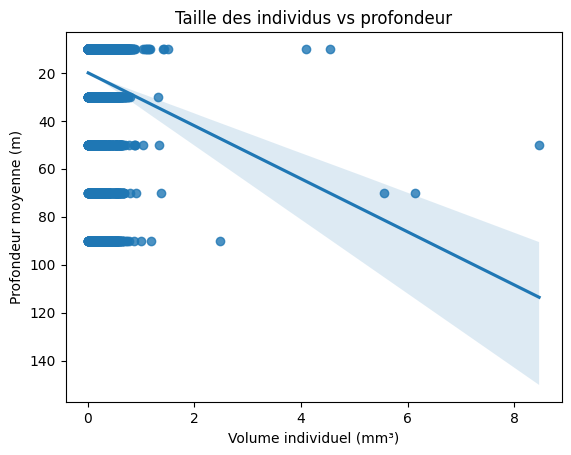

In [57]:
sns.regplot(x='V_mm3', y='Avg_depth', data=all_profiles_data)
plt.xlabel('Volume individuel (mm³)')
plt.ylabel('Profondeur moyenne (m)')
plt.title('Taille des individus vs profondeur')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import seaborn as sns

# Filtrez les données pour ne garder que les Cyclops prealpinus
species = 'Cyclops prealpinus'
filtered_data = all_profiles_data[all_profiles_data['Taxa'] == species]

# Utilisez sns.regplot pour tracer la régression linéaire
sns.regplot(x='V_mm3', y='Avg_depth', data=filtered_data)
plt.xlabel('Volume individuel (mm³)')
plt.ylabel('Profondeur moyenne (m)')
plt.title(f'Taille des individus vs profondeur ({species})')
plt.gca().invert_yaxis()
plt.show()

In [60]:
from scipy.stats import pearsonr

species = 'Cyclops prealpinus'
filtered_data = all_profiles_data[all_profiles_data['Taxa'] == species]

correlation, p_value = pearsonr(filtered_data['V_mm3'], filtered_data['Avg_depth'])
print(f"Corrélation de Pearson: {correlation:.2f}, p-value: {p_value:.5f}")

Corrélation de Pearson: 0.07, p-value: 0.00000


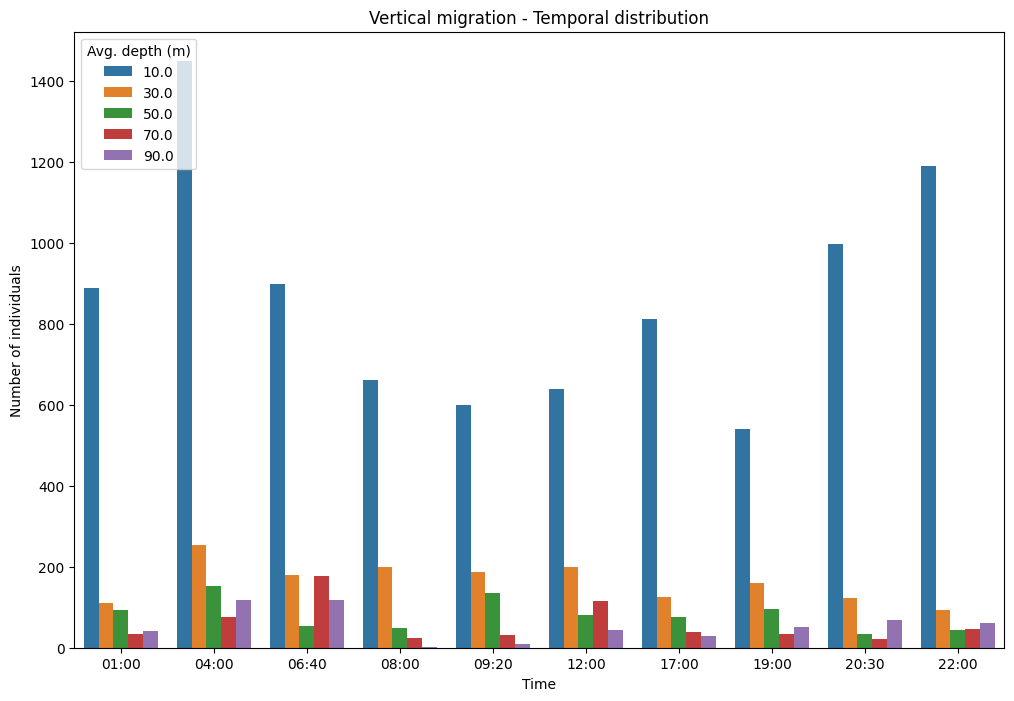

In [64]:
# Ajoutez une colonne 'Profile' à chaque profil
for idx, profile in enumerate(profiles, start=1):
    profile['Profile'] = idx

# Concaténez tous les profils en un seul DataFrame
all_profiles = pd.concat(profiles, ignore_index=True)

# Créez une colonne 'Hour' pour stocker l'heure associée à chaque profil
all_profiles['Hour'] = all_profiles['Profile'].map(dict(zip(range(1, len(hours) + 1), hours)))

# Groupez les données par heure et profondeur moyenne, puis calculez le nombre d'individus pour chaque groupe
grouped_data = all_profiles.groupby(['Hour', 'Avg_depth']).size().reset_index(name='Count')

# Créez un graphique à barres empilées pour visualiser la distribution des individus en fonction de la profondeur et du temps
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Hour', y='Count', hue='Avg_depth', data=grouped_data, ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_title('Vertical migration - Temporal distribution')
plt.legend(title='Avg. depth (m)', loc='upper left')
plt.show()
